In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
stock_df = pd.read_csv("S&P500_Stock_Data.csv")
stock_df

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
...,...,...,...
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981


In [3]:
stock_df.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764328
max,3.000000,70.000000,3000.000000


## Data Visualization

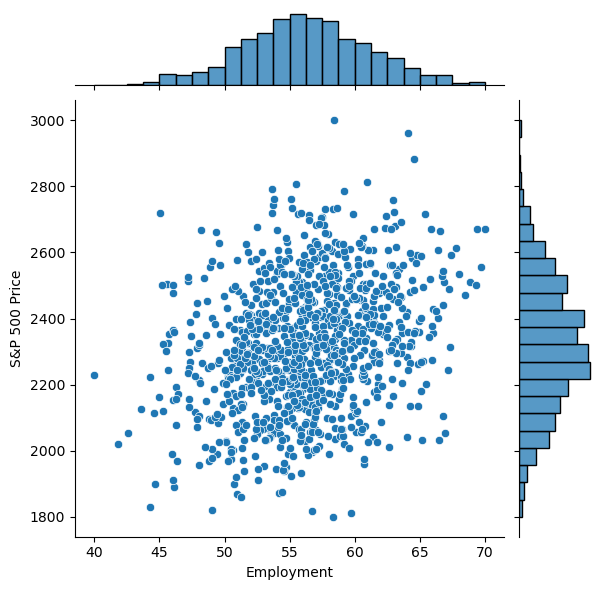

In [6]:
sns.jointplot(x = "Employment", y = "S&P 500 Price", data = stock_df)
plt.show()

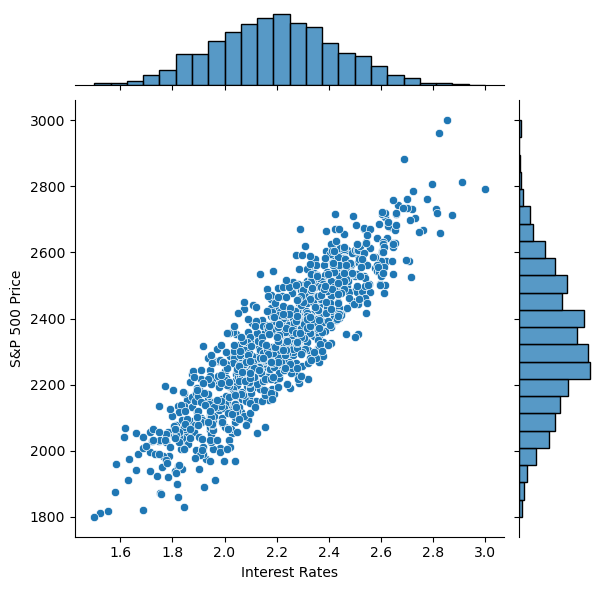

In [7]:
sns.jointplot(x = "Interest Rates", y = "S&P 500 Price", data = stock_df)
plt.show()

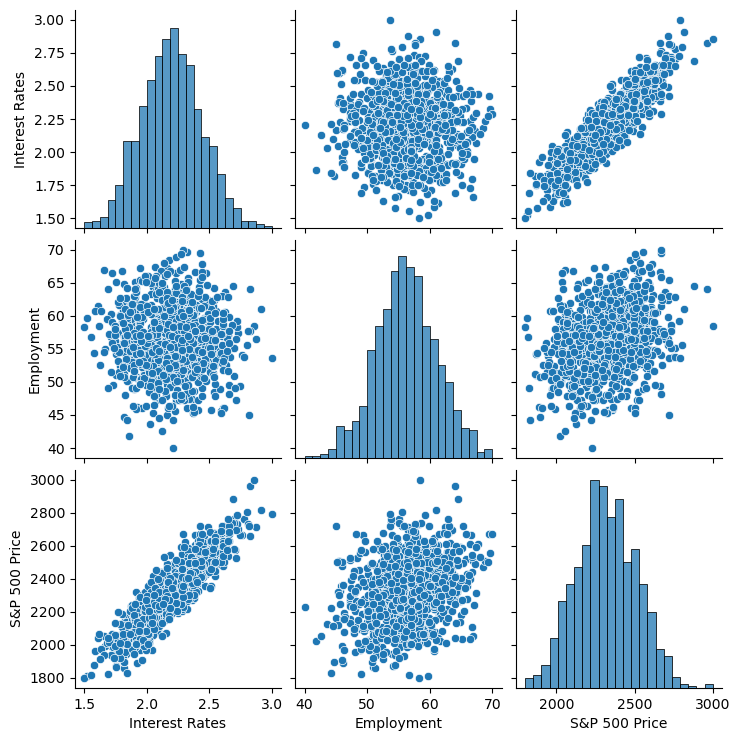

In [9]:
sns.pairplot(data = stock_df)
plt.show()

## Training and Testing data

In [13]:
y = stock_df["S&P 500 Price"]
y

0      2206.680582
1      2486.474488
2      2405.868337
3      2140.434475
4      2411.275663
          ...     
995    2578.699184
996    2573.865933
997    2004.911218
998    2344.098981
999    2156.133786
Name: S&P 500 Price, Length: 1000, dtype: float64

In [12]:
X = stock_df[["Interest Rates", "Employment"]]
X

,Interest Rates,Employment
0,1.943859,55.413571
1,2.258229,59.546305
2,2.215863,57.414687
3,1.977960,49.908353
4,2.437723,52.035492
...,...,...
995,2.528420,52.390828
996,2.643571,54.626204
997,2.009644,57.004357
998,2.201656,62.447790


## Training the model 

In [75]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
X_train.shape

(800, 2)

In [104]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [105]:
regressor.fit(X_train, y_train)

LinearRegression()

In [106]:
print(f"Linear Model Coefficients-> m: {regressor.coef_} b: {regressor.intercept_}")

Linear Model Coefficients-> m: [727.55257618  12.31742267] b: 30.904978320754708


## Evaluating the Model

In [107]:
y_predict = regressor.predict(X_test)
y_predict.shape

(200,)

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

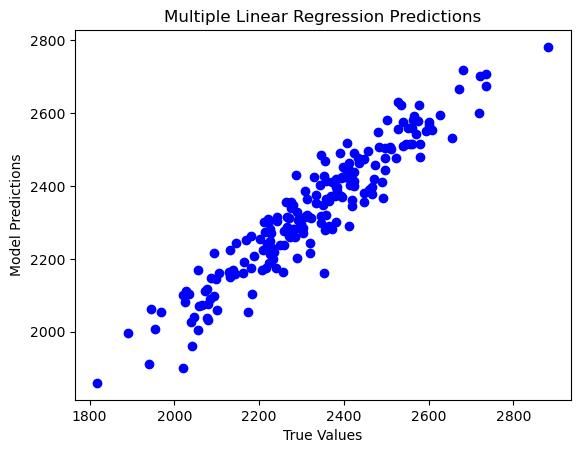

In [108]:
plt.scatter(y_test, y_predict, color = "blue")
plt.ylabel("Model Predictions")
plt.xlabel("True Values")
plt.title("Multiple Linear Regression Predictions")

In [109]:
k = X_test.shape[1]
k

2

In [110]:
n =len(X_test)
n

200

In [111]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [112]:
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - (((1 - r2) * (n-1)) / (n - k - 1))
MAPE = np.mean( np.abs( (y_test - y_predict) / y_test) ) * 100

In [113]:
print(f"RMSE = {round(RMSE,3)} \nMSE = {round(MSE,3)} \nMAE = {round(MAE,3)} \nr2 = {r2} \nadj_r2 = {adj_r2} \nMAPE = {round(MAPE,2)}% error")


RMSE = 59.276 
MSE = 3513.605 
MAE = 47.227 
r2 = 0.8958792642873611 
adj_r2 = 0.8948222009806338 
MAPE = 2.05% error


-----------------------------------------
30% Testing, 70% Training

RMSE = 59.92 

MSE = 3590.461 

MAE = 47.915 

r2 = 0.893470708820445 

adj_r2 = 0.8927533398562729 

MAPE = 2.08% error

## Results Visualization

In [114]:
from mpl_toolkits.mplot3d import Axes3D

In [119]:
x_surf, y_surf = np.meshgrid( np.linspace( stock_df["Interest Rates"].min(), stock_df["Interest Rates"].max(), 100), 
                              np.linspace(stock_df["Employment"].min(), stock_df["Employment"].max(), 100))

In [120]:
x_surf.shape

(100, 100)

In [122]:
feautures = pd.DataFrame( {"Interest Rates" : x_surf.ravel(), "Employment" : y_surf.ravel() } )
feautures

,Interest Rates,Employment
0,1.500000,40.0
1,1.515152,40.0
2,1.530303,40.0
3,1.545455,40.0
4,1.560606,40.0
...,...,...
9995,2.939394,70.0
9996,2.954545,70.0
9997,2.969697,70.0
9998,2.984848,70.0


In [129]:
fittedY = regressor.predict(feautures).reshape(x_surf.shape)


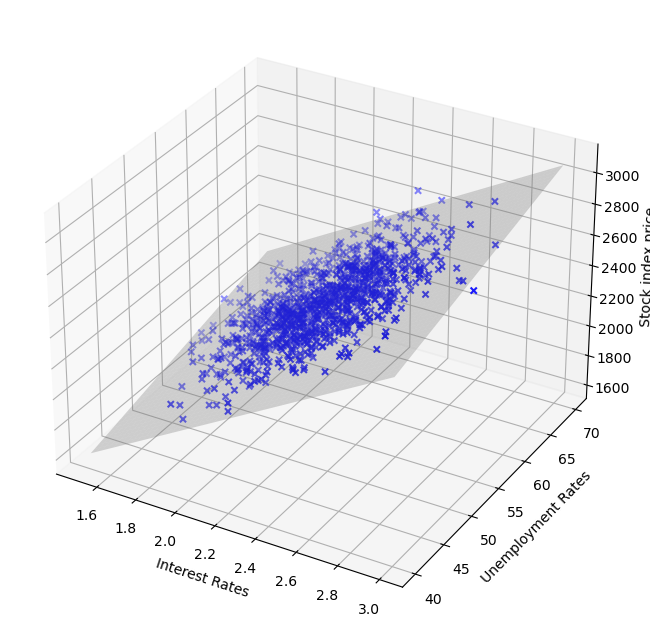

In [136]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter( stock_df["Interest Rates"], stock_df["Employment"], stock_df["S&P 500 Price"], color = "blue", marker = "x")
ax.plot_surface(x_surf, y_surf, fittedY, color = "grey", alpha = 0.3)
ax.set_xlabel("Interest Rates")
ax.set_ylabel("Unemployment Rates")
ax.set_zlabel("Stock index price")
plt.show()

In [143]:
predictions = pd.DataFrame( {'Interest Rates': [1.500000, 2.2 ,2 , 1.9 ], 'Employment' : [40.0, 52, 55, 60] } )
predictions

,Interest Rates,Employment
0,1.5,40.0
1,2.2,52.0
2,2.0,55.0
3,1.9,60.0


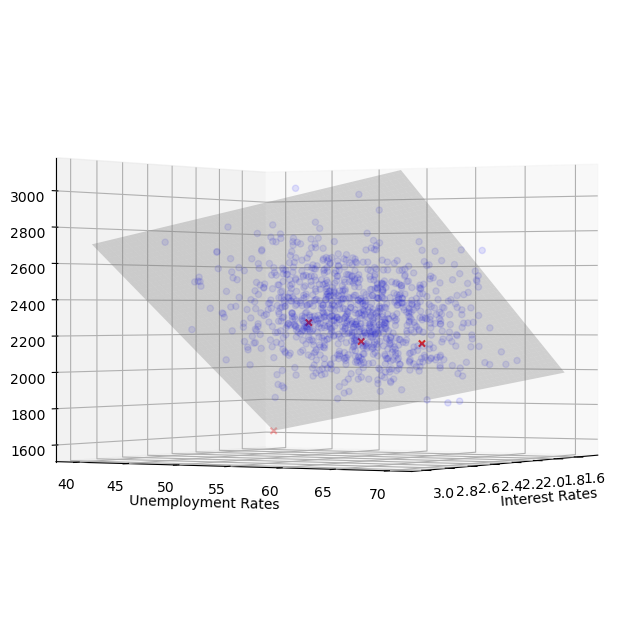

In [145]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(stock_df["Interest Rates"], stock_df["Employment"], stock_df["S&P 500 Price"], color = "blue", marker = "o", alpha=0.1)
ax.scatter(predictions["Interest Rates"], predictions["Employment"], regressor.predict(predictions), color = "red", marker = "x")
ax.plot_surface(x_surf, y_surf, fittedY, color = "grey", alpha = 0.3)
ax.set_xlabel("Interest Rates")
ax.set_ylabel("Unemployment Rates")
ax.set_zlabel("Stock index price")
# Ajusta la posición del zlabel
ax.view_init(0,30)
plt.show()